# Trajectory GSP Test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, reduction
import pandas

%load_ext autoreload
%autoreload 2
%matplotlib widget

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

#COLOR = 'white'
#plt.rcParams['text.color'] = COLOR
#plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['xtick.color'] = COLOR
#plt.rcParams['ytick.color'] = COLOR


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read the input trajectory data

In [3]:
dataset_path = '/home/berlukas/Documents/results/beta_opt_i_think_its_done/'
trajectory_file = dataset_path + 'vertex_poses_velocities_biases_header_less.csv'

print(f'Reading trajectory from {trajectory_file}')
traj_df = pandas.read_csv(trajectory_file, names=['ts', 'vertex-id', 'mission_id', 'p_G_Ix', 'p_G_Iy', 'p_G_Iz', 'q_G_Iw', 'q_G_Ix', 'q_G_Iy', 'q_G_Iz', 'p_M_Ix', 'p_M_Iy', 'p_M_Iz', 'q_M_Iw', 'q_M_Ix', 'q_M_Iy', 'q_M_Iz', 'v_Mx', 'v_My', 'v_Mz', 'bgx', 'bgy', 'bgz', 'bax', 'bay', 'baz'], delimiter=',', header=None)

print(f'\nRead {traj_df.size} entries.')

Reading trajectory from /home/berlukas/Documents/results/beta_opt_i_think_its_done/vertex_poses_velocities_biases_header_less.csv

Read 156806 entries.


In [4]:
missions = [' a27f05e28a7752160d00000000000000', ' 4f632353847852160d00000000000000', ' 5f8996e79b7552160d00000000000000', ' d1431183987552160d00000000000000', ]
#for i in range(0, len(missions)):
for i in range(0, 1):
    print(f'Processing training mission: {missions[i]}')
    current_df = traj_df[traj_df['mission_id'] == missions[i]]    
current_df.head()

Processing training mission:  a27f05e28a7752160d00000000000000


,ts,vertex-id,mission_id,p_G_Ix,p_G_Iy,p_G_Iz,q_G_Iw,q_G_Ix,q_G_Iy,q_G_Iz,...,q_M_Iz,v_Mx,v_My,v_Mz,bgx,bgy,bgz,bax,bay,baz
0,1.582393e+18,43e6721e8c7752163300000000000000,a27f05e28a7752160d00000000000000,-3.740466,0.000348,0.664771,0.999996,0.002072,-0.000799,0.001806,...,-0.012130,-0.018574,0.005911,0.001917,0.004513,-0.003858,-0.008746,0.027279,-0.082399,-0.028510
1,1.582393e+18,785185ef8c775216e000000000000000,a27f05e28a7752160d00000000000000,-3.742247,0.004076,0.667624,0.999998,0.001573,-0.000660,0.001335,...,-0.012602,0.012876,0.001222,-0.000942,0.004513,-0.003858,-0.008746,0.027278,-0.082400,-0.028512
2,1.582393e+18,af46c9d58d7752169901000000000000,a27f05e28a7752160d00000000000000,-3.743561,0.001063,0.663533,0.999997,0.001883,-0.000795,0.001652,...,-0.012285,-0.014164,-0.003278,-0.000450,0.004514,-0.003858,-0.008746,0.027271,-0.082405,-0.028520
3,1.582393e+18,85234b708e7752161702000000000000,a27f05e28a7752160d00000000000000,-3.743301,0.002251,0.665962,0.999997,0.001653,-0.000623,0.001534,...,-0.012403,0.016682,0.003969,0.000270,0.004514,-0.003858,-0.008746,0.027264,-0.082411,-0.028522
4,1.582393e+18,3d4d5b558f775216d202000000000000,a27f05e28a7752160d00000000000000,-3.742705,0.002069,0.668934,0.999997,0.001897,-0.000300,0.001597,...,-0.012340,-0.016561,-0.004201,0.003157,0.004514,-0.003858,-0.008746,0.027247,-0.082424,-0.028524


In [17]:
mission_graph = current_df[['p_G_Ix', 'p_G_Iy']].to_numpy()
G = graphs.NNGraph(mission_graph, use_flann=False, k=3)
G.compute_fourier_basis()
G.plot()

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:941: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f46edb39470>)

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb636071748>)

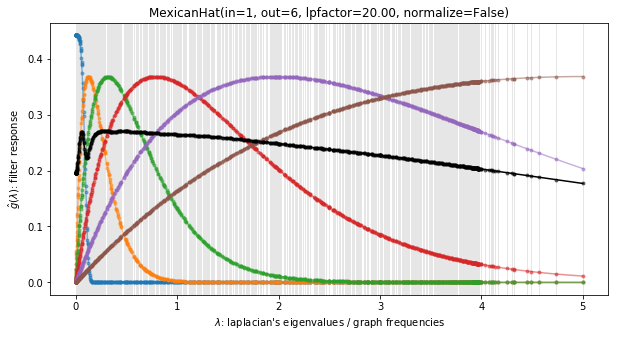

In [24]:
%matplotlib inline
g = filters.MexicanHat(G, Nf=6)
fig, ax = plt.subplots(figsize=(10, 5))
g.plot(ax=ax)

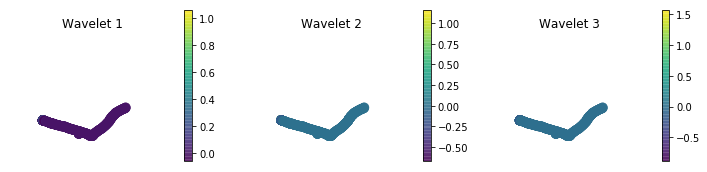

In [25]:
DELTA = 10
s = g.localize(DELTA)

fig = plt.figure(figsize=(10, 2.5))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    G.plot_signal(s[:, i], ax=ax)
    _ = ax.set_title('Wavelet {}'.format(i+1))
    ax.set_axis_off()
fig.tight_layout()

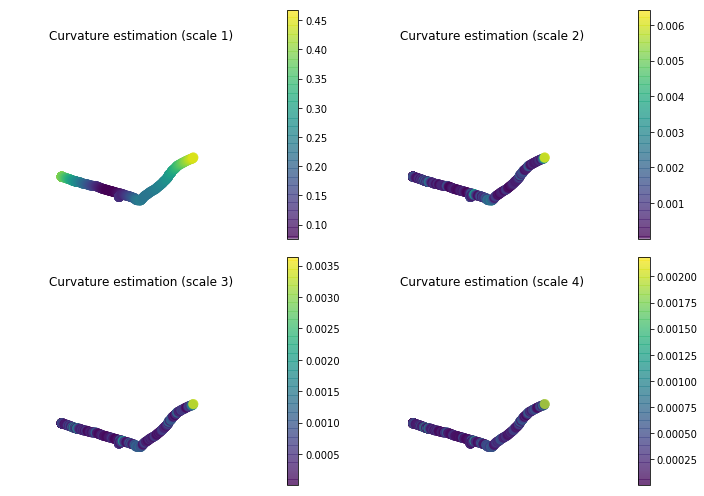

In [27]:
s = G.coords
s = g.filter(s)
s = np.linalg.norm(s, ord=2, axis=1)
fig = plt.figure(figsize=(10, 7))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    G.plot_signal(s[:, i], ax=ax)
    title = 'Curvature estimation (scale {})'.format(i+1)
    _ = ax.set_title(title)
    ax.set_axis_off()

    fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

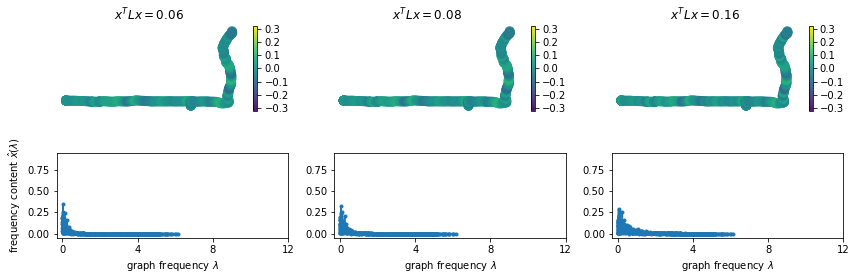

In [66]:
%matplotlib widget
scales = [30, 20, 10]
limit = 0.32

fig, axes = plt.subplots(2, len(scales), figsize=(12, 4))
fig.subplots_adjust(hspace=0.5)

x0 = np.random.RandomState(1).normal(size=G.N)
for i, scale in enumerate(scales):
    g = pg.filters.Heat(G, scale)
    x = g.filter(x0).squeeze()
    x /= np.linalg.norm(x)
    x_hat = G.gft(x).squeeze()

    assert np.all((-limit < x) & (x < limit))
    G.plot(x, limits=[-limit, limit], ax=axes[0, i])
    axes[0, i].set_axis_off()
    axes[0, i].set_title('$x^T L x = {:.2f}$'.format(G.dirichlet_energy(x)))

    axes[1, i].plot(G.e, np.abs(x_hat), '.-')
    axes[1, i].set_xticks(range(0, 16, 4))
    axes[1, i].set_xlabel(r'graph frequency $\lambda$')
    axes[1, i].set_ylim(-0.05, 0.95)

axes[1, 0].set_ylabel(r'frequency content $\hat{x}(\lambda)$')

# axes[0, 0].set_title(r'$x$: signal in the vertex domain')
# axes[1, 0].set_title(r'$\hat{x}$: signal in the spectral domain')

fig.tight_layout()


In [125]:

n_nodes = np.shape(mission_graph)[0]
ind = np.arange(0, n_nodes, 5)
Gs = reduction.kron_reduction(G, ind)
Gs.plot()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:941: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb634ea0390>)

In [130]:
n_nodes = np.shape(mission_graph)[0]
min = 1/np.sqrt(n_nodes)
levels = 6

Gs = reduction.graph_multiresolution(G, levels, sparsify=False)
for idx in range(levels):
    fig, ax = Gs[idx].plot(title='Reduction level: {}'.format(idx))

#Gs = reduction.graph_sparsify(G, 0.9)
#Gs.set_coordinates()
#Gs.coords = G.coords
#Gs.plot()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:941: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

## Drift test

Create noised graph by adding additive Gaussian noise to the `mission_graph`

In [150]:
noised_mission_graph = mission_graph
n_samples = 50
noise = np.random.normal(0.0, 0.5, [n_samples,2])
noised_mission_graph[300:300+n_samples, :] += noise


In [151]:
Gn = graphs.NNGraph(noised_mission_graph, use_flann=False, k=3)
Gn.compute_fourier_basis()
Gn.plot()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:941: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb629ba1ac8>)

In [162]:
n_nodes = np.shape(mission_graph)[0]
ind = np.arange(0, n_nodes, 5)
Gs = reduction.kron_reduction(G, ind)

scales = [10, 3, 0]
limit = 0.42

fig, axes = plt.subplots(2, len(scales), figsize=(12, 4))
fig.subplots_adjust(hspace=0.5)


x0 = np.random.RandomState(1).normal(size=Gs.N)
for i, scale in enumerate(scales):
    g = pg.filters.Heat(Gs, scale)
    x = g.filter(x0).squeeze()
    x /= np.linalg.norm(x)
    x_hat = Gs.gft(x).squeeze()

    assert np.all((-limit < x) & (x < limit))
    Gs.plot(x, limits=[-limit, limit], ax=axes[0, i])
    axes[0, i].set_axis_off()
    axes[0, i].set_title('$x^T L x = {:.2f}$'.format(Gs.dirichlet_energy(x)))

    axes[1, i].plot(Gs.e, np.abs(x_hat), '.-')
    axes[1, i].set_xticks(range(0, 16, 4))
    axes[1, i].set_xlabel(r'graph frequency $\lambda$')
    axes[1, i].set_ylim(-0.05, 0.95)

axes[1, 0].set_ylabel(r'frequency content $\hat{x}(\lambda)$')

# axes[0, 0].set_title(r'$x$: signal in the vertex domain')
# axes[1, 0].set_title(r'$\hat{x}$: signal in the spectral domain')
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:941: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

2021-01-31 13:22:27,542:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.
2021-01-31 13:22:27,548:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


In [163]:
n_nodes = np.shape(noised_mission_graph)[0]
ind = np.arange(0, n_nodes, 5)
Gns = reduction.kron_reduction(Gn, ind)

scales = [10, 3, 0]
limit = 0.42

fig, axes = plt.subplots(2, len(scales), figsize=(12, 4))
fig.subplots_adjust(hspace=0.5)

x0 = np.random.RandomState(1).normal(size=Gns.N)
for i, scale in enumerate(scales):
    g = pg.filters.Heat(Gns, scale)
    x = g.filter(x0).squeeze()
    x /= np.linalg.norm(x)
    x_hat = Gns.gft(x).squeeze()

    assert np.all((-limit < x) & (x < limit))
    Gns.plot(x, limits=[-limit, limit], ax=axes[0, i])
    axes[0, i].set_axis_off()
    axes[0, i].set_title('$x^T L x = {:.2f}$'.format(Gns.dirichlet_energy(x)))

    axes[1, i].plot(Gns.e, np.abs(x_hat), '.-')
    axes[1, i].set_xticks(range(0, 16, 4))
    axes[1, i].set_xlabel(r'graph frequency $\lambda$')
    axes[1, i].set_ylim(-0.05, 0.95)

axes[1, 0].set_ylabel(r'frequency content $\hat{x}(\lambda)$')

# axes[0, 0].set_title(r'$x$: signal in the vertex domain')
# axes[1, 0].set_title(r'$\hat{x}$: signal in the spectral domain')
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:941: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

2021-01-31 13:22:38,696:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.
2021-01-31 13:22:38,700:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


## Drifted version V2
The topology of the graph should not change, only the signal that is defined on it

In [22]:
noised_mission_graph = np.copy(mission_graph)
n_samples = 2
noise = np.random.normal(0.0, 1.5, [n_samples,2])
noised_mission_graph[300:300+n_samples, :] += noise

In [23]:
x_orig = np.linalg.norm(mission_graph, ord=2, axis=1)
x_noised = np.linalg.norm(noised_mission_graph, ord=2, axis=1)

In [56]:
#n_nodes = np.shape(mission_graph)[0]
#ind = np.arange(0, n_nodes, 5)
#Gs = reduction.kron_reduction(G, ind)

limit = 0.42
fig, axes = plt.subplots(2, 1, figsize=(24, 8))
fig.subplots_adjust(hspace=0.5)

g = filters.Rectangular(G,band_min=0.6, band_max=1)
x_hp = g.filter(x_orig).squeeze()

# do we need to normalize x?
x_hat = G.gft(x_hp).squeeze()

#assert np.all((-limit < x_orig) & (x_orig < limit))
#G.plot(x_orig, limits=[-limit, limit], ax=axes[0, i])
G.plot(x_hp, ax=axes[0])
axes[0].set_axis_off()
axes[0].set_title('$x^T L x = {:.2f}$'.format(G.dirichlet_energy(x_hp)))

axes[1].plot(G.e, np.abs(x_hat), '.-')
axes[1].set_xticks(range(0, 16, 4))
axes[1].set_xlabel(r'graph frequency $\lambda$')
axes[1].set_ylim(-0.05, 0.95)

axes[1].set_ylabel(r'frequency content $\hat{x}(\lambda)$')
fig.tight_layout()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [59]:
limit = 0.42
fig, axes = plt.subplots(2, 1, figsize=(24, 8))
fig.subplots_adjust(hspace=0.5)

x_hp = x_noised - x_orig
g = filters.Rectangular(G,band_min=0.6, band_max=1)
x_hp = g.filter(x_hp).squeeze()


# do we need to normalize x?
x_hat = G.gft(x_hp).squeeze()

#assert np.all((-limit < x_orig) & (x_orig < limit))
#G.plot(x_orig, limits=[-limit, limit], ax=axes[0, i])
G.plot(x_hp, ax=axes[0])
axes[0].set_axis_off()
axes[0].set_title('$x^T L x = {:.2f}$'.format(G.dirichlet_energy(x_hp)))

axes[1].plot(G.e, np.abs(x_hat), '.-')
axes[1].set_xticks(range(0, 16, 4))
axes[1].set_xlabel(r'graph frequency $\lambda$')
axes[1].set_ylim(-0.05, 0.95)

axes[1].set_ylabel(r'frequency content $\hat{x}(\lambda)$')
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [60]:
np.where(np.abs(x_hat) > 0.6)

(array([440, 461, 562]),)

In [52]:
x_hat[295:305]

array([ 3.33111303e-04,  2.51595522e-04,  1.75771459e-03,  1.35009731e-02,
       -3.42642324e-03, -5.20395135e-06,  1.64592153e-04,  2.16382149e-03,
        2.92160534e-03,  9.11378657e-03])